<h1> Práctica 3: Generación de texto </h1>

## Procesamiento de lenguaje Natural

### Facultad de Ingeniería UNAM 

#### Por: Aguilar Torres Karla Daniela, Lara Sala Kevin Arturo y Martínez Martínez Vanessa

En esta ocasión se busca generar un texto que cumpla la Ley de Zipf ayudandonos de los ejemplos vistos en clase. Es importante mencionar que para su realización nos basamos en el notebook visto en clase, elaborado por el profesor Victor Mijangos, en el curso de Procesamiento del Lenguaje Natural

Librerías a utilizar:

In [2]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from operator import itemgetter
from collections import Counter
from nltk.corpus import brown

Descargar el corpus y pasarlo a minúsculas 

In [7]:
#Se genera el corpus, a partir de la libería brown.
palab = list(brown.words())
#Se pasa el corpus a minúsculas.
palab = [w.lower() for w in palab]
#Se limpia el corpus, eliminando signos y stopwords.
palab = [i for i in palab if i.isalpha()]

Obtenemos sus frecuencias

In [9]:
#Se obtiene el número de palabras.
palab_frec = Counter(palab)

Las ordenamos de mayor a menor

In [10]:
palab_frec = sorted(palab_frec.items(), key=itemgetter(1), reverse=True)

frec = np.array([pair[1] for pair in palab_frec])

Número de tipos N

In [11]:
N = len(frec)

Obtenemos los rangos y logaritmos

In [12]:
rang = np.array(range(1,N+1)) 
log_frec = np.log(frec)
log_rang = np.log(rang)

Los datos seguirán una distribución Zipf, aproximada por una línea recta con pendiente negativa

Rangos y frecuencias. Con la librería de pandas para estimar las desviaciones estándar y la correlación de Pearson

In [13]:
rang_data = pd.DataFrame(data=log_rang, columns=['log rangos'])
frec_data = pd.DataFrame(data=log_frec, columns=['log frecuencias'])
param = frec_data.join(rang_data)

Estimación del parámetro de acuerdo a su fórmula 

In [14]:
est_par = float(rang_data.std())/float(rang_data.std())
a = float(param.corr()['log rangos']['log frecuencias'])*est_par
print(a)

-0.9856023874236124


A continuación pasamos a la generación de texto por medio de la función de probabilidad de zipf

In [15]:
fp = rang**a
prob = fp/fp.sum(0)

print(prob.sum(0))

0.9999999999999999


De acuerdo con esta probabilidad, podemos usar tantas palabras como sea posible para componer un texto. Sin embargo, tal distribución estimada aumenta la independencia de cada palabra.

In [16]:
palab_prob = np.random.choice([pair[0] for pair in palab_frec], size=100, p=prob)

palab_gen = ' '.join(palab_prob)
print(palab_gen)

my usga thereof the before part train go lets deluxer factory the wod industry have nearly was behalf just playmate when tell sustain carefully been the week fromm i the sum already seizure radic make the remaining like my elaine a be quicken byzantine the the aerospace very versatile a dark triplets expunging means june embroidered pati stood of offering the of favorable of account each own all the of but work thoughtfully that field the applicants haney he was sir knife engine turn say of him expedition which a peas found project day had circle the stopped as fords


Por lo tanto el texto ahora cumple la distibución

Ordenar frecuencias del texto 

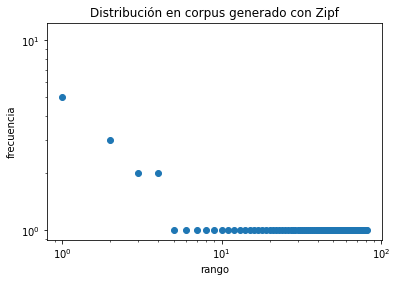

In [18]:
freqs_gen = Counter(palab_prob)
gen_zipf = np.array(sorted(freqs_gen.values(), reverse=True))

plt.plot(gen_zipf, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('rango')
plt.ylabel('frecuencia')
plt.title('Distribución en corpus generado con Zipf')
plt.show()